In [2167]:
# import libaries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import f_classif
import numpy as np

Import the csv file

In [2168]:
# import csv
df = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')
df


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev Evangelist/Advocate|DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


Crate a copy of the csv file

In [2169]:
# create a copy of the datafram
df1 = df.copy()

Exclude selfemployed and non tech employers since they add no value for the use case.

In [2170]:
# exclude selfemployed
df1 = df1.loc[(df1['Are you self-employed?'] == 0)]
df1 = df1.reset_index(drop = True)

# exclude non tech
df1 = df1.loc[(df1['Is your employer primarily a tech company/organization?'] == 1)]
df1 = df1.reset_index(drop = True)

Check if it worked

In [2171]:
# show number of employed tech people
len(df1)

883

Preprocces data

1. Adjust unrealistic age data

In [2172]:
# check the age column
df1['What is your age?'].value_counts()

What is your age?
30     62
28     57
31     56
29     55
26     50
32     50
33     43
35     41
27     38
34     37
37     36
36     31
39     31
25     30
24     30
38     28
40     24
22     22
23     20
45     16
44     15
42     15
41     15
43     13
21     11
46     10
47      7
49      6
20      5
48      4
50      4
52      3
55      3
53      2
57      2
17      1
51      1
54      1
323     1
61      1
99      1
58      1
3       1
63      1
19      1
70      1
Name: count, dtype: int64

In [2173]:
# Change unralistic outliers
df1.at[444, 'What is your age?'] = df1['What is your age?'].median()
df1.at[384, 'What is your age?'] = df1['What is your age?'].median()
df1.at[264, 'What is your age?'] = df1['What is your age?'].median()

2. simplify gender data

In [2174]:
# cheack the gender col
df1['What is your gender?'].value_counts()

What is your gender?
Male                                                       390
male                                                       155
Female                                                      88
female                                                      57
M                                                           53
m                                                           42
f                                                           17
F                                                           17
Female                                                       5
Male                                                         4
woman                                                        4
non-binary                                                   4
Male (cis)                                                   2
man                                                          2
male                                                         2
female                            

In [2175]:
#Fix erraneous inputs - Reassign values to Male, Female, or Diverse
df1['What is your gender?'].replace(['male', 'm','M', 'Male (cis)', 'cisdude', 'Dude', 'Male.', 'Cis male',
                                   'Cis Male', 'cis male', 'cis man', 'mail', 'Male (trans, FtM)', 'MALE',
                                   'Male (trans, FtM)', 'Male/genderqueer', 'Malr', 'Man', 'Sex is male',
                                   'man', 'male ', 'M|','Male ',
                                    'I\'m a man why didn\'t you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? '],
                                   'Male', inplace = True)

df1['What is your gender?'].replace(['Female', 'female', 'I identify as female.', 'female ',
                                    'Female assigned at birth ', 'Cis female ', 'Transitioned, M2F',
                                    'Female or Multi-Gender Femme', 'woman', 'female/woman',
                                    'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
                                    ' Female', 'Cis-woman', 'Female ', 'F', 'Woman', 'fm', 'f'], 'Female', inplace = True)
df1['What is your gender?'].replace(['Genderfluid (born female)', 'female-bodied; no feelings about gender', 'non-binary',
                                    'AFAB', 'Agender', 'genderqueer', 'Genderflux demi-girl', 'mtf', 'Genderqueer',
                                   'Transgender woman', 'Other/Transfeminine', 'human', 'Queer', 'Unicorn',
                                   'Androgynous', 'Fluid', 'nb masculine', 'Genderfluid', 'none of your business',
                                   'Bigender', 'Enby', 'genderqueer woman', 'Nonbinary','male 9:1 female, roughly', 'Other',
                                    'Human'], 'Diverse', inplace = True)

/var/folders/78/59h2v8v932d536sz4kn1vh6m0000gp/T/ipykernel_7788/2873738559.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['What is your gender?'].replace(['male', 'm','M', 'Male (cis)', 'cisdude', 'Dude', 'Male.', 'Cis male',


Check if everything works out

In [2176]:
df1


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,Male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,0,More than 1000,1.0,NaN,Yes,I am not sure,No,Yes,Yes,Somewhat easy,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer|Designer,Sometimes
4,0,26-100,1.0,NaN,I don't know,No,No,No,I don't know,Somewhat easy,...,Not applicable to me,Not applicable to me,30,Male,United States of America,Tennessee,United States of America,Tennessee,Back-end Developer,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,0,100-500,1.0,NaN,Yes,I am not sure,Yes,Yes,Yes,Somewhat easy,...,Rarely,Rarely,24,Male,Canada,NaN,Canada,NaN,Supervisor/Team Lead|Front-end Developer|Back-end Developer|DevOps/SysAdmin|Dev Evangelist/Advocate,Sometimes
879,0,100-500,1.0,NaN,I don't know,I am not sure,No,I don't know,I don't know,Somewhat easy,...,Rarely,Often,26,Female,Canada,NaN,Canada,NaN,Other,Sometimes
880,0,500-1000,1.0,NaN,Yes,No,No,No,Yes,Somewhat easy,...,Rarely,Often,38,Female,United States of America,Illinois,United States of America,Illinois,Support,Always
881,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes


3 Reduce Dataframe

3.1 Drop cols with obsolete or too much missing data

In [2177]:
# Dropping Features
dropped_feat = [col for col in df.columns if df1[col].isna().sum() >= 0.80 * df1.shape[0]]

df1.drop(labels = dropped_feat, axis = 1, inplace = True)

print("Number of features dropped : ", len(dropped_feat))

Number of features dropped :  9


3.2 Drop Clomuns which have become osolete due to filter

In [2178]:
# Drop unecescarry columns because of filter
df1.drop(['Is your employer primarily a tech company/organization?'], axis = 1, inplace = True)
df1.drop(['Are you self-employed?'], axis = 1, inplace = True)

# Drop cols because of usecase
df1.drop(['What country do you live in?'], axis = 1, inplace = True)
df1.drop(['What US state or territory do you live in?'], axis = 1, inplace = True)
df1.drop(['What country do you work in?'], axis = 1, inplace = True)
df1.drop(['What US state or territory do you work in?'], axis = 1, inplace = True)


In [2179]:
df1['Why or why not?'].value_counts()

Why or why not?
Not relevant                                                                                                                                                                                                                                                                                          2
Fear of discrimination                                                                                                                                                                                                                                                                                2
bias                                                                                                                                                                                                                                                                                                  2
It would depend on the health issue. If there is a health issue that would not immediately affec

In [2180]:
df1['Which of the following best describes your work position?'].value_counts()

Which of the following best describes your work position?
Back-end Developer                                                                                     205
Front-end Developer                                                                                     89
Other                                                                                                   73
Supervisor/Team Lead                                                                                    40
Back-end Developer|Front-end Developer                                                                  38
                                                                                                      ... 
Other|Supervisor/Team Lead                                                                               1
Supervisor/Team Lead|DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer|Designer             1
Other|Supervisor/Team Lead|Dev Evangelist/Advocate                                    

In [2181]:
df1['Why or why not?.1'].value_counts()

Why or why not?.1
Stigma                                                                                                                                                                                                                                                                         8
Stigma.                                                                                                                                                                                                                                                                        7
Same as above                                                                                                                                                                                                                                                                  4
See above                                                                                                                                                          

In [2182]:
df1.drop(['Why or why not?'], axis = 1, inplace = True)
df1.drop(['Why or why not?.1'], axis = 1, inplace = True)
df1.drop(['Which of the following best describes your work position?'], axis = 1, inplace = True)
df1.drop(['If yes, what condition(s) have you been diagnosed with?'], axis = 1, inplace = True)
df1.drop(['If maybe, what condition(s) do you believe you have?'], axis = 1, inplace = True)
df1.drop(['If so, what condition(s) were you diagnosed with?'], axis = 1, inplace = True)


4. Change String data to numerical data

In [2183]:
df1['Do you work remotely?'].value_counts()

Do you work remotely?
Sometimes    469
Never        213
Always       201
Name: count, dtype: int64

In [2184]:
df1

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,Do you work remotely?
0,26-100,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,Maybe,...,No,Yes,No,Yes,0,Not applicable to me,Not applicable to me,39,Male,Sometimes
1,6-25,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,...,Yes,Yes,Yes,Yes,1,Rarely,Sometimes,29,Male,Never
2,6-25,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,...,No,Maybe,No,No,1,Not applicable to me,Not applicable to me,38,Male,Always
3,More than 1000,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,Maybe,...,No,No,Yes,No,1,Not applicable to me,Often,42,Male,Sometimes
4,26-100,I don't know,No,No,No,I don't know,Somewhat easy,No,No,Maybe,...,No,No,No,No,0,Not applicable to me,Not applicable to me,30,Male,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,100-500,Yes,I am not sure,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,...,I don't know,Maybe,Maybe,No,0,Rarely,Rarely,24,Male,Sometimes
879,100-500,I don't know,I am not sure,No,I don't know,I don't know,Somewhat easy,Maybe,No,Maybe,...,I don't know,Yes,Yes,Yes,1,Rarely,Often,26,Female,Sometimes
880,500-1000,Yes,No,No,No,Yes,Somewhat easy,No,No,Yes,...,Yes,Yes,Yes,Yes,1,Rarely,Often,38,Female,Always
881,100-500,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,Maybe,Maybe,Yes,...,Yes,Yes,Maybe,Yes,1,Rarely,Sometimes,52,Male,Sometimes


In [2185]:
df1['Do you work remotely?'].value_counts()

Do you work remotely?
Sometimes    469
Never        213
Always       201
Name: count, dtype: int64

In [2186]:
df1['What is your gender?'].value_counts()

What is your gender?
Male       659
Female     201
Diverse     22
Name: count, dtype: int64

In [2187]:
col_name = 'What is your gender?'

mapping = {
    'Diverse': 2,
    'Female': 1,
    'Male': 0
}
df1[col_name] = df1[col_name].map(mapping)

In [2188]:
df1['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'].value_counts()

If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?
Often                   330
Not applicable to me    295
Sometimes               215
Rarely                   34
Never                     9
Name: count, dtype: int64

In [2189]:
df1['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'].value_counts()

If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?
Not applicable to me    345
Sometimes               230
Rarely                  196
Never                    77
Often                    35
Name: count, dtype: int64

In [2190]:
col_name = 'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'

mapping = {
    'Not applicable to me': 4,
    'Often': 3,
    'Sometimes': 2,
    'Rarely': 1,
    'Never': 0
}
df1[col_name] = df1[col_name].map(mapping)

In [2191]:
df1['Have you been diagnosed with a mental health condition by a medical professional?'].value_counts()

Have you been diagnosed with a mental health condition by a medical professional?
No     449
Yes    434
Name: count, dtype: int64

In [2192]:
col_name = 'Have you been diagnosed with a mental health condition by a medical professional?'

mapping = {
    'Yes': 1,
    'No': 0
}
df1[col_name] = df1[col_name].map(mapping)

In [2193]:
df1['Do you currently have a mental health disorder?'].value_counts()

Do you currently have a mental health disorder?
Yes      348
No       340
Maybe    195
Name: count, dtype: int64

In [2194]:
col_name = 'Do you currently have a mental health disorder?'

mapping = {
    'Yes': 2,
    'Maybe': 1,
    'No': 0
}
df1[col_name] = df1[col_name].map(mapping)

In [2195]:
df1['Have you had a mental health disorder in the past?'].value_counts()

Have you had a mental health disorder in the past?
Yes      452
No       288
Maybe    143
Name: count, dtype: int64

In [2196]:
col_name = 'Have you had a mental health disorder in the past?'

mapping = {
    'Yes': 2,
    'Maybe': 1,
    'No': 0
}
df1[col_name] = df1[col_name].map(mapping)

In [2197]:
df1['Do you have a family history of mental illness?'].value_counts()

Do you have a family history of mental illness?
Yes             416
No              309
I don't know    158
Name: count, dtype: int64

In [2198]:
col_name = 'Do you have a family history of mental illness?'

mapping = {
    'Yes': 2,
    'No': 0,
    "I don't know": 1
}
df1[col_name] = df1[col_name].map(mapping)

In [2199]:
df1['Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?'].value_counts()

Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?
No       154
Yes      139
Maybe     91
Name: count, dtype: int64

In [2200]:
col_name = 'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?'

mapping = {
    'Yes': 2,
    'Maybe': 1,
    'No': 0
}
df1[col_name] = df1[col_name].map(mapping)

In [2201]:
df1['Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'].value_counts()

Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?
No                    388
Maybe/Not sure        213
Yes, I observed       146
Yes, I experienced    101
Name: count, dtype: int64

In [2202]:
col_name = 'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'

mapping = {
    'Yes, I experienced': 3,
    'Yes, I observed': 2,
    'Maybe/Not sure': 1,
    'No': 0
}
df1[col_name] = df1[col_name].map(mapping)

In [2203]:
df1['How willing would you be to share with friends and family that you have a mental illness?'].value_counts()

How willing would you be to share with friends and family that you have a mental illness?
Somewhat open                                            409
Very open                                                155
Somewhat not open                                        130
Neutral                                                   84
Not applicable to me (I do not have a mental illness)     59
Not open at all                                           46
Name: count, dtype: int64

In [2204]:
col_name = 'How willing would you be to share with friends and family that you have a mental illness?'

mapping = {
    'Not applicable to me (I do not have a mental illness)': 5,
    'Very open': 4,
    'Somewhat open': 3,
    'Neutral': 2,
    "Somewhat not open": 1,
    'Not open at all': 0
}
df1[col_name] = df1[col_name].map(mapping)

In [2205]:
df1['Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?'].value_counts()

Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
Maybe                           367
No, I don't think they would    244
Yes, I think they would         212
No, they do not                  35
Yes, they do                     25
Name: count, dtype: int64

In [2206]:
col_name = 'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?'

mapping = {
    'Yes, they do': 4,
    'Yes, I think they would': 3,
    'Maybe': 2,
    "No, I don't think they would": 1,
    'No, they do not': 0
}
df1[col_name] = df1[col_name].map(mapping)

In [2207]:
df1['Do you feel that being identified as a person with a mental health issue would hurt your career?'].value_counts()

Do you feel that being identified as a person with a mental health issue would hurt your career?
Maybe                         376
Yes, I think it would         331
No, I don't think it would     91
Yes, it has                    62
No, it has not                 23
Name: count, dtype: int64

In [2208]:
col_name = 'Do you feel that being identified as a person with a mental health issue would hurt your career?'

mapping = {
    'Yes, it has': 4,
    'Yes, I think it would': 3,
    'Maybe': 2,
    "No, I don't think it would": 1,
    'No, it has not': 0
}
df1[col_name] = df1[col_name].map(mapping)

In [2209]:
df1['Would you bring up a mental health issue with a potential employer in an interview?'].value_counts()

Would you bring up a mental health issue with a potential employer in an interview?
No       557
Maybe    250
Yes       76
Name: count, dtype: int64

In [2210]:
col_name = 'Would you bring up a mental health issue with a potential employer in an interview?'

mapping = {
    'Yes': 1,
    'No': 0,
    'Maybe': 2
}
df1[col_name] = df1[col_name].map(mapping)

In [2211]:
df1['Would you be willing to bring up a physical health issue with a potential employer in an interview?'].value_counts()

Would you be willing to bring up a physical health issue with a potential employer in an interview?
Maybe    369
No       287
Yes      227
Name: count, dtype: int64

In [2212]:
col_name = 'Would you be willing to bring up a physical health issue with a potential employer in an interview?'

mapping = {
    'Yes': 1,
    'No': 0,
    'Maybe': 2
}
df1[col_name] = df1[col_name].map(mapping)

In [2213]:
df1['Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?'].value_counts()

Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?
None of them        486
Some of them        269
Yes, all of them     33
Name: count, dtype: int64

In [2214]:
col_name = 'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?'

mapping = {
    'Yes, all of them': 1,
    'None of them': 0,
    'Some of them': 2
}
df1[col_name] = df1[col_name].map(mapping)

In [2215]:
df1['Did you feel that your previous employers took mental health as seriously as physical health?'].value_counts()

Did you feel that your previous employers took mental health as seriously as physical health?
Some did             287
None did             278
I don't know         190
Yes, they all did     33
Name: count, dtype: int64

In [2216]:
col_name = 'Did you feel that your previous employers took mental health as seriously as physical health?'

mapping = {
    'Yes, they all did': 1,
    'None did': 0,
    'Some did': 2,
    "I don't know": 3
}
df1[col_name] = df1[col_name].map(mapping)

In [2217]:
df1['Would you have been willing to discuss a mental health issue with your direct supervisor(s)?'].value_counts()

Would you have been willing to discuss a mental health issue with your direct supervisor(s)?
Some of my previous employers           416
No, at none of my previous employers    255
Yes, at all of my previous employers     64
I don't know                             53
Name: count, dtype: int64

In [2218]:
col_name = 'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?'

mapping = {
    'Yes, at all of my previous employers': 1,
    'No, at none of my previous employers': 0,
    'Some of my previous employers': 2,
    "I don't know": 3
}
df1[col_name] = df1[col_name].map(mapping)

In [2219]:
df1['Would you have been willing to discuss a mental health issue with your previous co-workers?'].value_counts()

Would you have been willing to discuss a mental health issue with your previous co-workers?
Some of my previous employers           462
No, at none of my previous employers    266
Yes, at all of my previous employers     60
Name: count, dtype: int64

In [2220]:
col_name = 'Would you have been willing to discuss a mental health issue with your previous co-workers?'

mapping = {
    'Yes, at all of my previous employers': 1,
    'No, at none of my previous employers': 0,
    'Some of my previous employers': 2
}
df1[col_name] = df1[col_name].map(mapping)

In [2221]:
df1['Do you think that discussing a physical health issue with previous employers would have negative consequences?'].value_counts()

Do you think that discussing a physical health issue with previous employers would have negative consequences?
Some of them        389
None of them        350
Yes, all of them     49
Name: count, dtype: int64

In [2222]:
df1['Do you think that discussing a mental health disorder with previous employers would have negative consequences?'].value_counts()

Do you think that discussing a mental health disorder with previous employers would have negative consequences?
Some of them        397
I don't know        188
Yes, all of them    129
None of them         74
Name: count, dtype: int64

In [2223]:
col_name = 'Do you think that discussing a mental health disorder with previous employers would have negative consequences?'

mapping = {
    'Yes, all of them': 1,
    'None of them': 0,
    "I don't know": 3,
    'Some of them': 2
}
df1[col_name] = df1[col_name].map(mapping)

In [2224]:
df1['Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?'].value_counts()

Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
I don't know    510
Yes, always     105
Sometimes        91
No               82
Name: count, dtype: int64

In [2225]:
col_name = 'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?'

mapping = {
    'Yes, always': 1,
    'No': 0,
    "I don't know": 3,
    'Sometimes': 2
}
df1[col_name] = df1[col_name].map(mapping)

In [2226]:
df1['Did your previous employers provide resources to learn more about mental health issues and how to seek help?'].value_counts()

Did your previous employers provide resources to learn more about mental health issues and how to seek help?
None did             498
Some did             252
Yes, they all did     38
Name: count, dtype: int64

In [2227]:
col_name = 'Did your previous employers provide resources to learn more about mental health issues and how to seek help?'

mapping = {
    'None did': 0,
    'Some did': 1,
    'Yes, they all did': 2
}
df1[col_name] = df1[col_name].map(mapping)

In [2228]:
df1['Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?'].value_counts()

Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
None did             526
Some did             179
I don't know          60
Yes, they all did     23
Name: count, dtype: int64

In [2229]:
col_name = 'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?'

mapping = {
    'None did': 0,
    'Some did': 1,
    'Yes, they all did': 2,
    "i don't know": 3
}
df1[col_name] = df1[col_name].map(mapping)

In [2230]:
df1['Were you aware of the options for mental health care provided by your previous employers?'].value_counts()

Were you aware of the options for mental health care provided by your previous employers?
N/A (not currently aware)          351
I was aware of some                260
Yes, I was aware of all of them    108
No, I only became aware later       69
Name: count, dtype: int64

In [2231]:
col_name = 'Were you aware of the options for mental health care provided by your previous employers?'

mapping = {
    'N/A (not currently aware)': 0,
    'No, I only became aware later of them': 1,
    'I was aware of some': 2,
    "Yes, I was aware of all of them": 3
}
df1[col_name] = df1[col_name].map(mapping)

In [2232]:
df1['Have your previous employers provided mental health benefits?'].value_counts()

Have your previous employers provided mental health benefits?
Some did             266
No, none did         207
I don't know         190
Yes, they all did    125
Name: count, dtype: int64

In [2233]:
col_name = 'Have your previous employers provided mental health benefits?'

mapping = {
    'No, none did': 0,
    'Some did': 1,
    'Yes, they all did': 2,
    "I don't know": 3
}
df1[col_name] = df1[col_name].map(mapping)

In [2234]:
df1['Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?'].value_counts()

Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
No     809
Yes     74
Name: count, dtype: int64

In [2235]:
col_name = 'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?'

mapping = {
    'Yes': 1,
    'No': 0
}
df1[col_name] = df1[col_name].map(mapping)

In [2236]:
df1['Do you feel that your employer takes mental health as seriously as physical health?'].value_counts()

Do you feel that your employer takes mental health as seriously as physical health?
I don't know    383
Yes             278
No              222
Name: count, dtype: int64

In [2237]:
col_name = 'Do you feel that your employer takes mental health as seriously as physical health?'

mapping = {
    'Yes': 1,
    'No': 0,
    'Maybe': 2
}
df1[col_name] = df1[col_name].map(mapping)

In [2238]:
df1['Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'].value_counts()

Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
Yes      334
Maybe    297
No       252
Name: count, dtype: int64

In [2239]:
col_name = 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'

mapping = {
    'Yes': 1,
    'No': 0,
    'Maybe': 2
}
df1[col_name] = df1[col_name].map(mapping)

In [2240]:
df1['Would you feel comfortable discussing a mental health disorder with your coworkers?'].value_counts()

Would you feel comfortable discussing a mental health disorder with your coworkers?
Maybe    385
No       276
Yes      222
Name: count, dtype: int64

In [2241]:
col_name = 'Would you feel comfortable discussing a mental health disorder with your coworkers?'

mapping = {
    'Yes': 1,
    'No': 0,
    'Maybe': 2
}
df1[col_name] = df1[col_name].map(mapping)

In [2242]:
df1['If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'].value_counts()

If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
Somewhat easy                 230
Very easy                     187
Somewhat difficult            148
Neither easy nor difficult    125
I don't know                  113
Very difficult                 80
Name: count, dtype: int64

In [2243]:
col_name = 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'

mapping = {
    'Very easy': 0,
    'Somewhat easy': 1,
    'Neither easy nor difficult': 2,
    'Somewhat difficult': 3,
    'Very difficult': 4,
    "I don't know": 5,
}
df1[col_name] = df1[col_name].map(mapping)

In [2244]:
df1['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts()

Does your employer provide mental health benefits as part of healthcare coverage?
Yes                                408
I don't know                       240
No                                 170
Not eligible for coverage / N/A     65
Name: count, dtype: int64

In [2245]:
# start preparingf data for unsupervised learning
col_name = 'Does your employer provide mental health benefits as part of healthcare coverage?'

mapping = {
    'Yes': 1,
    'No': 0,
    "I don't know": 2,
    'Not eligible for coverage / N/A': 3
}
df1[col_name] = df1[col_name].map(mapping)

In [2246]:
df1

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,Do you work remotely?
0,26-100,3,NaN,No,No,I don't know,0,No,No,2,...,0,2,0,1,0,4,Not applicable to me,39,0.0,Sometimes
1,6-25,0,Yes,Yes,Yes,Yes,1,No,No,2,...,2,2,2,1,1,1,Sometimes,29,0.0,Never
2,6-25,0,NaN,No,No,I don't know,2,Maybe,No,2,...,0,1,0,0,1,4,Not applicable to me,38,0.0,Always
3,More than 1000,1,I am not sure,No,Yes,Yes,1,Yes,Yes,2,...,0,0,2,0,1,4,Often,42,0.0,Sometimes
4,26-100,2,No,No,No,I don't know,1,No,No,2,...,0,0,0,0,0,4,Not applicable to me,30,0.0,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,100-500,1,I am not sure,Yes,Yes,Yes,1,No,No,2,...,1,1,1,0,0,1,Rarely,24,0.0,Sometimes
879,100-500,2,I am not sure,No,I don't know,I don't know,1,Maybe,No,2,...,1,2,2,1,1,1,Often,26,1.0,Sometimes
880,500-1000,1,No,No,No,Yes,1,No,No,1,...,2,2,2,1,1,1,Often,38,1.0,Always
881,100-500,1,Yes,Yes,Yes,I don't know,3,Maybe,Maybe,1,...,2,2,1,1,1,1,Sometimes,52,0.0,Sometimes


In [2247]:
df1['Do you think that discussing a physical health issue with your employer would have negative consequences?'].value_counts()

Do you think that discussing a physical health issue with your employer would have negative consequences?
No       656
Maybe    198
Yes       29
Name: count, dtype: int64

In [2248]:
col_name = 'Do you think that discussing a physical health issue with your employer would have negative consequences?'

mapping = {
    'Yes': 1,
    'No': 0,
    'Maybe': 2
}
df1[col_name] = df1[col_name].map(mapping)

In [2249]:
df1['Do you think that discussing a mental health disorder with your employer would have negative consequences?'].value_counts()

Do you think that discussing a mental health disorder with your employer would have negative consequences?
Maybe    366
No       359
Yes      158
Name: count, dtype: int64

In [2250]:
col_name = 'Do you think that discussing a mental health disorder with your employer would have negative consequences?'

mapping = {
    'Yes': 1,
    'No': 0,
    'Maybe': 2
}
df1[col_name] = df1[col_name].map(mapping)

In [2251]:
df1['Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'].value_counts()

Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
I don't know    573
Yes             241
No               69
Name: count, dtype: int64

In [2252]:
col_name = 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'

mapping = {
    'Yes': 1,
    'No': 0,
    "I don't know": 2
}
df1[col_name] = df1[col_name].map(mapping)

In [2253]:
df1['Does your employer offer resources to learn more about mental health concerns and options for seeking help?'].value_counts()

Does your employer offer resources to learn more about mental health concerns and options for seeking help?
No              421
I don't know    268
Yes             194
Name: count, dtype: int64

In [2254]:
col_name = 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?'

mapping = {
    'Yes': 1,
    'No': 0,
    "I don't know": 2
}
df1[col_name] = df1[col_name].map(mapping)

In [2255]:
df1['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'].value_counts()

Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
No              647
Yes             156
I don't know     80
Name: count, dtype: int64

In [2256]:
# start preparingf data for unsupervised learning
col_name = 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'

mapping = {
    'Yes': 1,
    'No': 0,
    "I don't know": 2
}
df1[col_name] = df1[col_name].map(mapping)

In [2257]:
df1['Do you know the options for mental health care available under your employer-provided coverage?'].value_counts()

Do you know the options for mental health care available under your employer-provided coverage?
No               276
I am not sure    267
Yes              233
Name: count, dtype: int64

In [2258]:
col_name = 'Do you know the options for mental health care available under your employer-provided coverage?'

mapping = {
    'Yes': 1,
    'No': 0,
    'I am not sure': 2,
    'Nan': 3
}
df1[col_name] = df1[col_name].map(mapping)

In [2259]:
df1['How many employees does your company or organization have?'].value_counts()

How many employees does your company or organization have?
26-100            246
100-500           207
6-25              182
More than 1000    134
500-1000           62
1-5                52
Name: count, dtype: int64

In [2260]:
col_name = 'How many employees does your company or organization have?'

mapping = {
    '1-5': 0,
    '6-25': 1,
    '26-100': 2,
    '100-500': 3,
    '500-1000': 4,
    'More than 1000': 5
}
df1[col_name] = df1[col_name].map(mapping)

In [2261]:
df1['Do you work remotely?'].value_counts()

Do you work remotely?
Sometimes    469
Never        213
Always       201
Name: count, dtype: int64

In [2262]:
col_name = 'Do you work remotely?'

mapping = {
    'Never': 0,
    'Sometimes': 1,
    'Always': 2
}
df1[col_name] = df1[col_name].map(mapping)

In [2263]:
df1['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'].value_counts()

If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?
Often                   330
Not applicable to me    295
Sometimes               215
Rarely                   34
Never                     9
Name: count, dtype: int64

In [2264]:
col_name = 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'

mapping = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Always': 3,
    'Not applicable to me': 4
}
df1[col_name] = df1[col_name].map(mapping)

In [2265]:
df1['Do you think that discussing a physical health issue with previous employers would have negative consequences?'].value_counts()

Do you think that discussing a physical health issue with previous employers would have negative consequences?
Some of them        389
None of them        350
Yes, all of them     49
Name: count, dtype: int64

In [2266]:
col_name = 'Do you think that discussing a physical health issue with previous employers would have negative consequences?'

mapping = {
    'None of them': 0,
    'Some of them': 1,
    'Yes, all of them': 2,
}
df1[col_name] = df1[col_name].map(mapping)

Check if everything worked out

In [2267]:
df1


,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,Do you work remotely?
0,2,3,NaN,0,0,2,0,0,0,2,...,0,2,0,1,0,4,4.0,39,0.0,1
1,1,0,1.0,1,1,1,1,0,0,2,...,2,2,2,1,1,1,2.0,29,0.0,0
2,1,0,NaN,0,0,2,2,2,0,2,...,0,1,0,0,1,4,4.0,38,0.0,2
3,5,1,2.0,0,1,1,1,1,1,2,...,0,0,2,0,1,4,NaN,42,0.0,1
4,2,2,0.0,0,0,2,1,0,0,2,...,0,0,0,0,0,4,4.0,30,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,3,1,2.0,1,1,1,1,0,0,2,...,1,1,1,0,0,1,1.0,24,0.0,1
879,3,2,2.0,0,2,2,1,2,0,2,...,1,2,2,1,1,1,NaN,26,1.0,1
880,4,1,0.0,0,0,1,1,0,0,1,...,2,2,2,1,1,1,NaN,38,1.0,2
881,3,1,1.0,1,1,2,3,2,2,1,...,2,2,1,1,1,1,2.0,52,0.0,1


Create a checkpoint

In [2268]:
df2 = df1.copy()

In [2269]:
df2

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,Do you work remotely?
0,2,3,NaN,0,0,2,0,0,0,2,...,0,2,0,1,0,4,4.0,39,0.0,1
1,1,0,1.0,1,1,1,1,0,0,2,...,2,2,2,1,1,1,2.0,29,0.0,0
2,1,0,NaN,0,0,2,2,2,0,2,...,0,1,0,0,1,4,4.0,38,0.0,2
3,5,1,2.0,0,1,1,1,1,1,2,...,0,0,2,0,1,4,NaN,42,0.0,1
4,2,2,0.0,0,0,2,1,0,0,2,...,0,0,0,0,0,4,4.0,30,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,3,1,2.0,1,1,1,1,0,0,2,...,1,1,1,0,0,1,1.0,24,0.0,1
879,3,2,2.0,0,2,2,1,2,0,2,...,1,2,2,1,1,1,NaN,26,1.0,1
880,4,1,0.0,0,0,1,1,0,0,1,...,2,2,2,1,1,1,NaN,38,1.0,2
881,3,1,1.0,1,1,2,3,2,2,1,...,2,2,1,1,1,1,2.0,52,0.0,1


Fill in empty features

In [2270]:
df2.fillna(df2.mean(), inplace = True)

In [2271]:
df2

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,Do you work remotely?
0,2,3,0.988402,0,0,2,0,0,0,2,...,0,2,0,1,0,4,4.000000,39,0.0,1
1,1,0,1.000000,1,1,1,1,0,0,2,...,2,2,2,1,1,1,2.000000,29,0.0,0
2,1,0,0.988402,0,0,2,2,2,0,2,...,0,1,0,0,1,4,4.000000,38,0.0,2
3,5,1,2.000000,0,1,1,1,1,1,2,...,0,0,2,0,1,4,2.972875,42,0.0,1
4,2,2,0.000000,0,0,2,1,0,0,2,...,0,0,0,0,0,4,4.000000,30,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,3,1,2.000000,1,1,1,1,0,0,2,...,1,1,1,0,0,1,1.000000,24,0.0,1
879,3,2,2.000000,0,2,2,1,2,0,2,...,1,2,2,1,1,1,2.972875,26,1.0,1
880,4,1,0.000000,0,0,1,1,0,0,1,...,2,2,2,1,1,1,2.972875,38,1.0,2
881,3,1,1.000000,1,1,2,3,2,2,1,...,2,2,1,1,1,1,2.000000,52,0.0,1


5. Create unsupervised Learning

5.1 scale df

In [2272]:
print(df2.isnull().sum())  # Count missing values per column


How many employees does your company or organization have?                                                                                                                          0
Does your employer provide mental health benefits as part of healthcare coverage?                                                                                                   0
Do you know the options for mental health care available under your employer-provided coverage?                                                                                     0
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?                                              0
Does your employer offer resources to learn more about mental health concerns and options for seeking help?                                                                         0
Is your anonymity protected if you choose to take advantage of mental health or substance 

In [2273]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)  # Apply scaling

# Check the new scaled values
df2_scaled  # Display the first 5 rows
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns)

In [2274]:
if df2_scaled.iloc[:, 0].nunique() == len(df):
    df2_scaled = df.iloc[:, 1:]

5.3 remove low variance features

In [2275]:
variance_threshold = VarianceThreshold(threshold=0.01)
df2_variance_reduced = variance_threshold.fit_transform(df2_scaled)
df2_variance_reduced = pd.DataFrame(df2_variance_reduced,
                                   columns=df2_scaled.columns[variance_threshold.get_support()])

5.4 reduce highly correlated features

In [2276]:
corr_matrix = df2_variance_reduced.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
df2_reduced = df2_variance_reduced.drop(to_drop, axis=1)

check reduced

In [2277]:
print(f"Reduced dataset shape: {df2_reduced.shape}")

Reduced dataset shape: (883, 42)


5.5 Dataframe was not reduced carry on with elbow criterion

In [2278]:
inertia = []
K_range = range(1, 11)  # Checking K values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df2_reduced)
    inertia.append(kmeans.inertia_)


Plot Elbow critrion

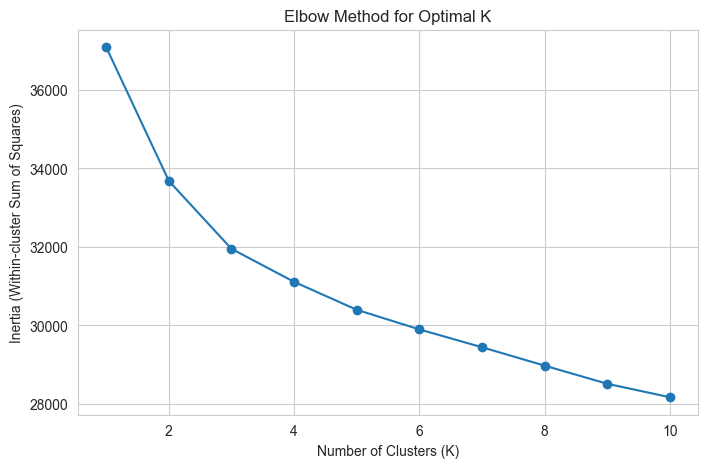

In [2279]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

5.6 Apply k means clustering

In [2280]:
optimal_k = 3  # Change this based on the elbow point
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df2_reduced['Cluster'] = kmeans.fit_predict(df2_reduced)

5.7 visualizing the clusters

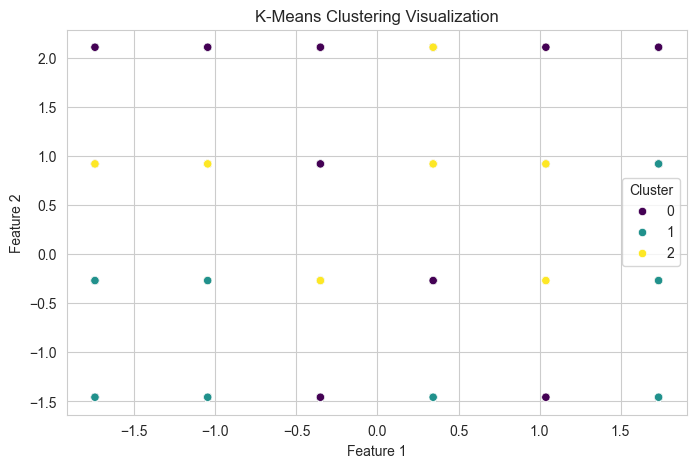

In [2281]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df2_reduced.iloc[:, 0], y=df2_reduced.iloc[:, 1], hue=df2_reduced['Cluster'], palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Visualization")
plt.legend(title="Cluster")
plt.show()

analyze clusters

In [2282]:
df2_reduced['Cluster'].value_counts()

Cluster
0    331
2    296
1    256
Name: count, dtype: int64

In [2283]:
df2_reduced

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,Do you work remotely?,Cluster
0,-0.352152,2.108510,1.415899e-16,-0.558220,-0.954450,0.677575,-1.227187,-1.112391,-0.576053,1.023589,...,0.908364,-1.143210,1.017134,-1.158523,1.115892,1.132291,0.862213,-0.555311,0.019851,0
1,-1.047789,-1.458184,1.479119e-02,1.001617,0.200042,-0.901049,-0.628179,-1.112391,-0.576053,1.023589,...,0.908364,1.122681,1.017134,0.863168,-1.009197,-1.072487,-0.522786,-0.555311,-1.440865,2
2,-1.047789,-1.458184,1.415899e-16,-0.558220,-0.954450,0.677575,-0.029170,1.094892,-0.576053,1.023589,...,-0.207193,-1.143210,-0.983154,0.863168,1.115892,1.132291,0.723713,-0.555311,1.480567,0
3,1.734760,-0.269286,1.290120e+00,-0.558220,0.200042,-0.901049,-0.628179,-0.008749,0.620782,1.023589,...,-1.322750,1.122681,-0.983154,0.863168,1.115892,0.000000,1.277713,-0.555311,0.019851,1
4,-0.352152,0.919612,-1.260538e+00,-0.558220,-0.954450,0.677575,-0.628179,-1.112391,-0.576053,1.023589,...,-1.322750,-1.143210,-0.983154,-1.158523,1.115892,1.132291,-0.384286,-0.555311,0.019851,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,0.343486,-0.269286,1.290120e+00,1.001617,0.200042,-0.901049,-0.628179,-1.112391,-0.576053,1.023589,...,-0.207193,-0.010265,-0.983154,-1.158523,-1.009197,-2.174875,-1.215286,-0.555311,0.019851,2
879,0.343486,0.919612,1.290120e+00,-0.558220,1.354534,0.677575,-0.628179,1.094892,-0.576053,1.023589,...,0.908364,1.122681,1.017134,0.863168,-1.009197,0.000000,-0.938286,1.443809,0.019851,2
880,1.039123,-0.269286,-1.260538e+00,-0.558220,-0.954450,-0.901049,-0.628179,-1.112391,-0.576053,-0.144149,...,0.908364,1.122681,1.017134,0.863168,-1.009197,0.000000,0.723713,1.443809,1.480567,2
881,0.343486,-0.269286,1.479119e-02,1.001617,0.200042,0.677575,0.569838,1.094892,1.817617,-0.144149,...,0.908364,-0.010265,1.017134,0.863168,-1.009197,-1.072487,2.662713,-0.555311,0.019851,1


In [2284]:
# Check the unique values in the mental health column (and their counts)
print("Unique values in the mental health column:\n", df2_reduced['Do you currently have a mental health disorder?'].value_counts())


Unique values in the mental health column:
 Do you currently have a mental health disorder?
 1.122681    348
-1.143210    340
-0.010265    195
Name: count, dtype: int64


In [2285]:
print(df2_reduced['Do you currently have a mental health disorder?'].dtype)

float64


In [2286]:
# Define the mental health column
mental_health_column = "Do you currently have a mental health disorder?"

# Fix floating point precision issue using a small tolerance (0.0001)
mental_health_yes_percentage = df2_reduced.groupby("Cluster")[mental_health_column].apply(lambda x: ((x - 1.122681).abs() < 0.0001).mean()) * 100
mental_health_maybe_percentage = df2_reduced.groupby("Cluster")[mental_health_column].apply(lambda x: ((x - (-0.010265)).abs() < 0.0001).mean()) * 100
mental_health_no_percentage = df2_reduced.groupby("Cluster")[mental_health_column].apply(lambda x: ((x - (-1.143210)).abs() < 0.0001).mean()) * 100

# Display results
print("\nPercentage of Employees with a Mental Health Disorder (Yes) per Cluster:")
print(mental_health_yes_percentage)

print("\nPercentage of Employees with 'Maybe' per Cluster:")
print(mental_health_maybe_percentage)

print("\nPercentage of Employees with 'No' per Cluster:")
print(mental_health_no_percentage)




Percentage of Employees with a Mental Health Disorder (Yes) per Cluster:
Cluster
0     2.416918
1    60.156250
2    62.837838
Name: Do you currently have a mental health disorder?, dtype: float64

Percentage of Employees with 'Maybe' per Cluster:
Cluster
0    18.429003
1    25.781250
2    22.972973
Name: Do you currently have a mental health disorder?, dtype: float64

Percentage of Employees with 'No' per Cluster:
Cluster
0    79.154079
1    14.062500
2    14.189189
Name: Do you currently have a mental health disorder?, dtype: float64


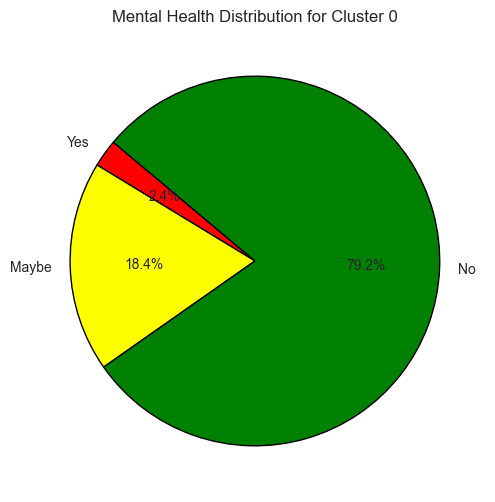

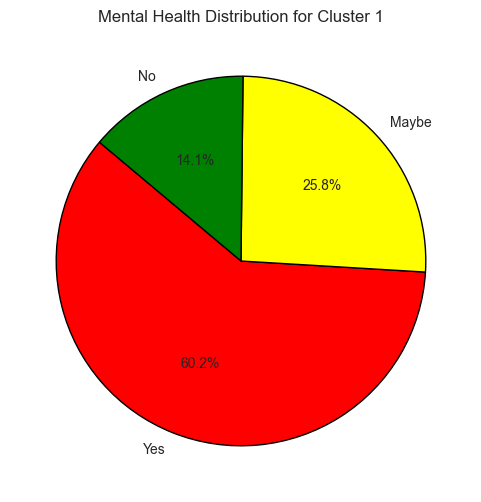

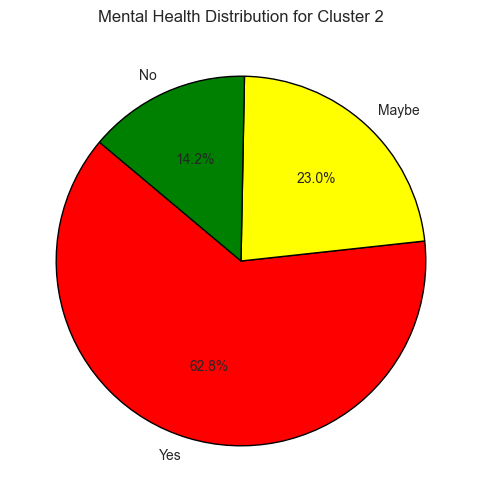

In [2287]:
import matplotlib.pyplot as plt

# Define colors and labels for the pie chart
colors = ['red', 'yellow', 'green']
labels = ["Yes", "Maybe", "No"]

# Create pie charts for each cluster
for cluster in mental_health_yes_percentage.index:
    # Extract percentages for the cluster
    sizes = [
        mental_health_yes_percentage[cluster],
        mental_health_maybe_percentage[cluster],
        mental_health_no_percentage[cluster],
    ]

    # Plot the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
    plt.title(f"Mental Health Distribution for Cluster {cluster}")
    plt.show()

6. Understand the output

In [2288]:
df2_reduced

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,Do you work remotely?,Cluster
0,-0.352152,2.108510,1.415899e-16,-0.558220,-0.954450,0.677575,-1.227187,-1.112391,-0.576053,1.023589,...,0.908364,-1.143210,1.017134,-1.158523,1.115892,1.132291,0.862213,-0.555311,0.019851,0
1,-1.047789,-1.458184,1.479119e-02,1.001617,0.200042,-0.901049,-0.628179,-1.112391,-0.576053,1.023589,...,0.908364,1.122681,1.017134,0.863168,-1.009197,-1.072487,-0.522786,-0.555311,-1.440865,2
2,-1.047789,-1.458184,1.415899e-16,-0.558220,-0.954450,0.677575,-0.029170,1.094892,-0.576053,1.023589,...,-0.207193,-1.143210,-0.983154,0.863168,1.115892,1.132291,0.723713,-0.555311,1.480567,0
3,1.734760,-0.269286,1.290120e+00,-0.558220,0.200042,-0.901049,-0.628179,-0.008749,0.620782,1.023589,...,-1.322750,1.122681,-0.983154,0.863168,1.115892,0.000000,1.277713,-0.555311,0.019851,1
4,-0.352152,0.919612,-1.260538e+00,-0.558220,-0.954450,0.677575,-0.628179,-1.112391,-0.576053,1.023589,...,-1.322750,-1.143210,-0.983154,-1.158523,1.115892,1.132291,-0.384286,-0.555311,0.019851,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,0.343486,-0.269286,1.290120e+00,1.001617,0.200042,-0.901049,-0.628179,-1.112391,-0.576053,1.023589,...,-0.207193,-0.010265,-0.983154,-1.158523,-1.009197,-2.174875,-1.215286,-0.555311,0.019851,2
879,0.343486,0.919612,1.290120e+00,-0.558220,1.354534,0.677575,-0.628179,1.094892,-0.576053,1.023589,...,0.908364,1.122681,1.017134,0.863168,-1.009197,0.000000,-0.938286,1.443809,0.019851,2
880,1.039123,-0.269286,-1.260538e+00,-0.558220,-0.954450,-0.901049,-0.628179,-1.112391,-0.576053,-0.144149,...,0.908364,1.122681,1.017134,0.863168,-1.009197,0.000000,0.723713,1.443809,1.480567,2
881,0.343486,-0.269286,1.479119e-02,1.001617,0.200042,0.677575,0.569838,1.094892,1.817617,-0.144149,...,0.908364,-0.010265,1.017134,0.863168,-1.009197,-1.072487,2.662713,-0.555311,0.019851,1


6.1 cluster means

In [2289]:
cluster_means = df2_reduced.groupby('Cluster').mean()
cluster_means

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,Do you work remotely?
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.123075,0.111449,-0.107064,0.030842,0.025648,0.090956,-0.157658,-0.118780,-0.185545,0.095749,...,-0.595861,-0.962132,-0.879655,-0.958982,-0.969180,0.901885,0.737487,-0.121095,-0.259369,-0.019866
1,0.120664,-0.148539,-0.086751,-0.284030,-0.196814,-0.062405,0.576858,0.469783,0.611432,-0.522751,...,0.378357,0.542322,0.511953,0.477994,0.484101,-0.347873,-0.315007,0.088561,0.235573,-0.117091
2,0.033269,0.003839,0.194751,0.211159,0.141538,-0.047739,-0.322603,-0.273474,-0.321321,0.345039,...,0.339089,0.606862,0.540898,0.658975,0.665097,-0.707664,-0.552252,0.058820,0.086298,0.123483


6.2 Anova Test

In [2290]:
X = df2_reduced.drop(columns=['Cluster'])  # Features
y = df2_reduced['Cluster']  # Cluster labels

f_values, p_values = f_classif(X, y)  # Perform ANOVA
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Value': f_values, 'P-Value': p_values})
anova_results = anova_results.sort_values(by='F-Value', ascending=False)


6.4 Train descicion Tree

In [2291]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


6.5 visualize it

In [2292]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

/var/folders/78/59h2v8v932d536sz4kn1vh6m0000gp/T/ipykernel_7788/996535034.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


Text(0.5, 1.0, 'Feature Importance (Decision Tree)')

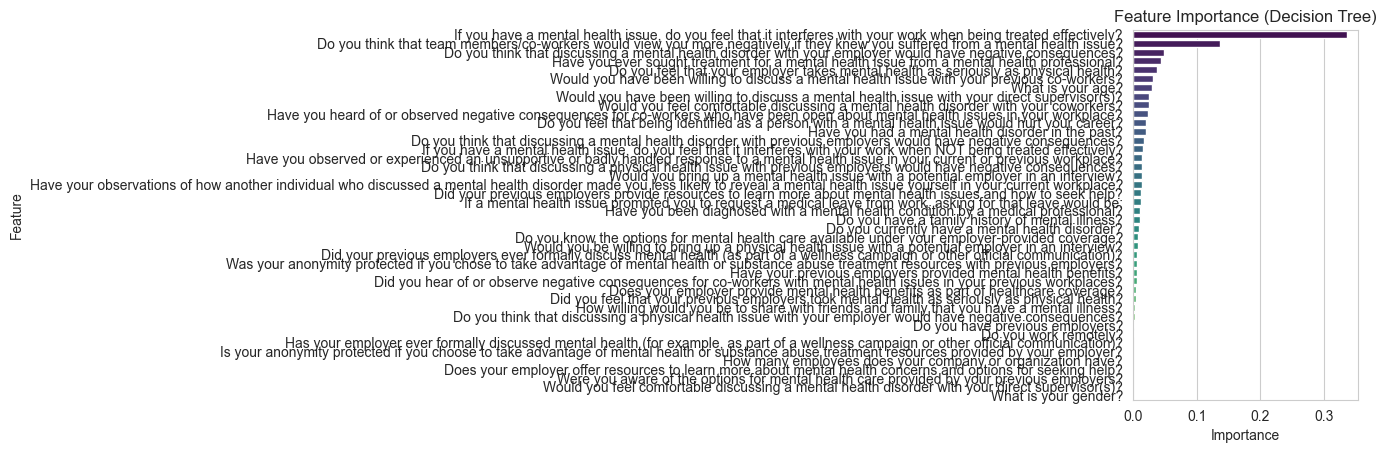

In [2293]:
plt.subplot(1, 2, 1)
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance (Decision Tree)")

/var/folders/78/59h2v8v932d536sz4kn1vh6m0000gp/T/ipykernel_7788/2608084936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anova_results, x='F-Value', y='Feature', palette='coolwarm')


Text(0.5, 1.0, 'ANOVA F-Values (Feature Importance)')

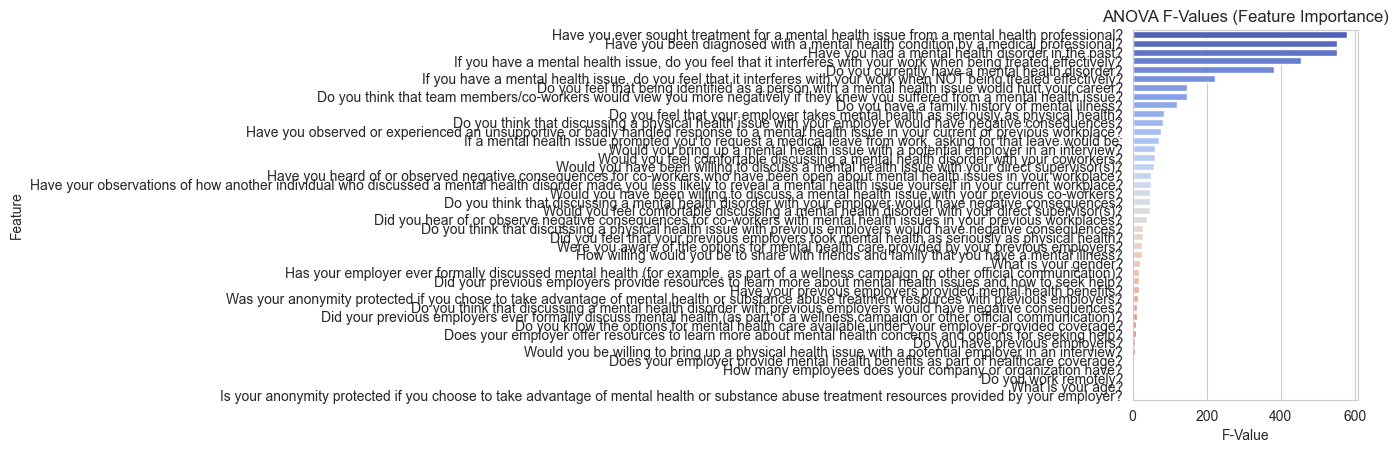

In [2294]:
plt.subplot(1, 2, 2)
sns.barplot(data=anova_results, x='F-Value', y='Feature', palette='coolwarm')
plt.title("ANOVA F-Values (Feature Importance)")


In [2295]:
print("Top Features based on ANOVA:\n", anova_results.head(10))
print("\nTop Features based on Decision Tree:\n", feature_importance.head(10))

Top Features based on ANOVA:
                                                                                                                            Feature  \
36                                     Have you ever sought treatment for a mental health issue from a mental health professional?   
35                                               Have you been diagnosed with a mental health condition by a medical professional?   
33                                                                              Have you had a mental health disorder in the past?   
37                If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?   
34                                                                                 Do you currently have a mental health disorder?   
38            If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?   
27                              

6.6 Find identifiers for each cluster

In [2296]:
X = df2_reduced.drop(columns=['Cluster'])  # Feature matrix
y = df2_reduced['Cluster']

In [2297]:
# Step 1: Compute Mean and Standard Deviation of Features per Cluster
cluster_summary = df2_reduced.groupby('Cluster').agg(['mean', 'std'])
print("Feature Statistics Per Cluster:\n", cluster_summary)

Feature Statistics Per Cluster:
         How many employees does your company or organization have?            \
                                                              mean       std   
Cluster                                                                        
0                                                        -0.123075  0.948186   
1                                                         0.120664  1.052496   
2                                                         0.033269  0.999605   

        Does your employer provide mental health benefits as part of healthcare coverage?  \
                                                                                     mean   
Cluster                                                                                     
0                                                                                0.111449   
1                                                                               -0.148539   
2                    

In [2298]:
cluster_importances = {}

for cluster_id in sorted(y.unique()):
    print(f"Analyzing importance for Cluster {cluster_id}...")

    # Convert clustering to binary classification: This cluster (1) vs. all other clusters (0)
    y_binary = (y == cluster_id).astype(int)

    # Train a Decision Tree Classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X, y_binary)

    # Store Feature Importances
    cluster_importances[cluster_id] = pd.Series(
        clf.feature_importances_, index=X.columns
    ).sort_values(ascending=False)

Analyzing importance for Cluster 0...
Analyzing importance for Cluster 1...
Analyzing importance for Cluster 2...



Top Features for Cluster 0:
 If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?                                                                    0.619124
Have you ever sought treatment for a mental health issue from a mental health professional?                                                                                         0.060998
Have you been diagnosed with a mental health condition by a medical professional?                                                                                                   0.043307
Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?    0.028825
Did your previous employers provide resources to learn more about mental health issues and how to seek help?                                                                        0.028386
dtype: float64


/var/folders/78/59h2v8v932d536sz4kn1vh6m0000gp/T/ipykernel_7788/630642567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.head(10), y=importance.head(10).index, palette="viridis")


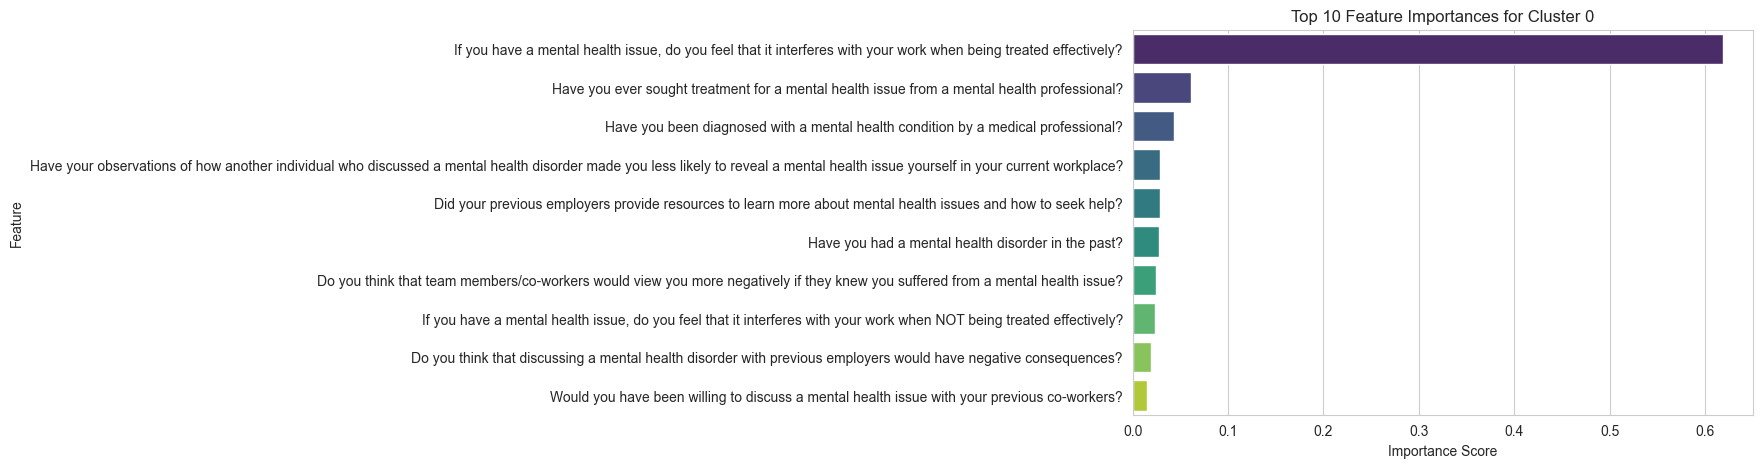


Top Features for Cluster 1:
 Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?    0.248290
Do you think that discussing a physical health issue with your employer would have negative consequences?                         0.079876
Have you had a mental health disorder in the past?                                                                                0.079662
If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?              0.078017
Do you feel that being identified as a person with a mental health issue would hurt your career?                                  0.053836
dtype: float64


/var/folders/78/59h2v8v932d536sz4kn1vh6m0000gp/T/ipykernel_7788/630642567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.head(10), y=importance.head(10).index, palette="viridis")


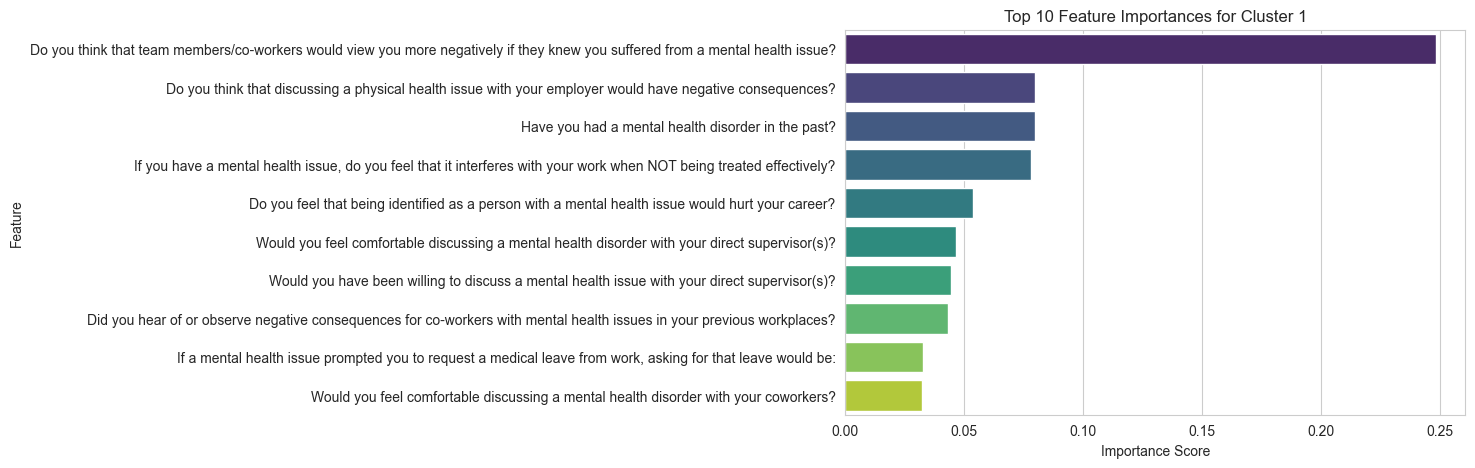


Top Features for Cluster 2:
 If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?                  0.249813
Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?    0.175791
Do you think that discussing a mental health disorder with your employer would have negative consequences?                        0.071530
Would you have been willing to discuss a mental health issue with your direct supervisor(s)?                                      0.057222
Do you feel that your employer takes mental health as seriously as physical health?                                               0.039471
dtype: float64


/var/folders/78/59h2v8v932d536sz4kn1vh6m0000gp/T/ipykernel_7788/630642567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.head(10), y=importance.head(10).index, palette="viridis")


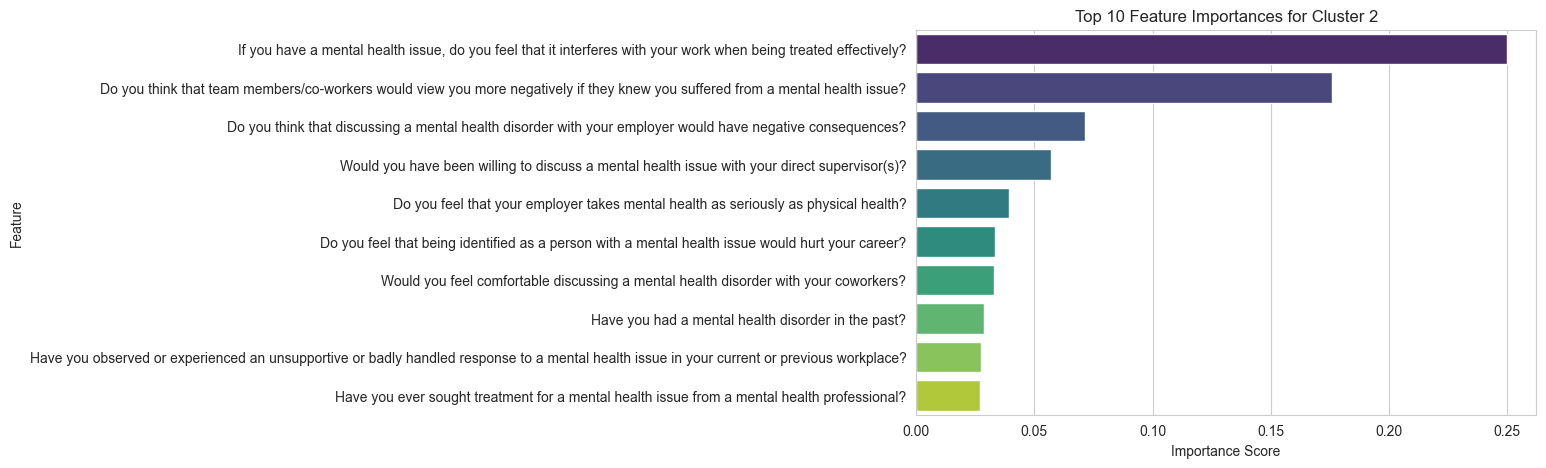

In [2299]:
# Step 3: Display Feature Importance for Each Cluster
for cluster_id, importance in cluster_importances.items():
    print(f"\nTop Features for Cluster {cluster_id}:\n", importance.head(5))

    # Plot Feature Importance
    plt.figure(figsize=(8, 5))
    sns.barplot(x=importance.head(10), y=importance.head(10).index, palette="viridis")
    plt.title(f"Top 10 Feature Importances for Cluster {cluster_id}")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()

In [2300]:
X = df2_reduced.drop(columns=['Cluster'])  # Feature matrix
y = df2_reduced['Cluster']

In [2301]:
cluster_importances = {}

In [2302]:
for cluster_id in sorted(y.unique()):
    print(f"Analyzing importance for Cluster {cluster_id}...")

    # Convert clustering to binary classification: This cluster (1) vs. all others (0)
    y_binary = (y == cluster_id).astype(int)

    # Train a Decision Tree Classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X, y_binary)

    # Compute Permutation Feature Importance
    perm_importance = permutation_importance(clf, X, y_binary, n_repeats=10, random_state=42)

    # Store results
    cluster_importances[cluster_id] = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)

Analyzing importance for Cluster 0...
Analyzing importance for Cluster 1...
Analyzing importance for Cluster 2...



Top Features for Cluster 0:
 If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?        0.146772
Have you ever sought treatment for a mental health issue from a mental health professional?                             0.087316
Have you had a mental health disorder in the past?                                                                      0.062627
If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?    0.053114
Have you been diagnosed with a mental health condition by a medical professional?                                       0.036127
dtype: float64


/var/folders/78/59h2v8v932d536sz4kn1vh6m0000gp/T/ipykernel_7788/1053046815.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.head(10), y=importance.head(10).index, palette="viridis")


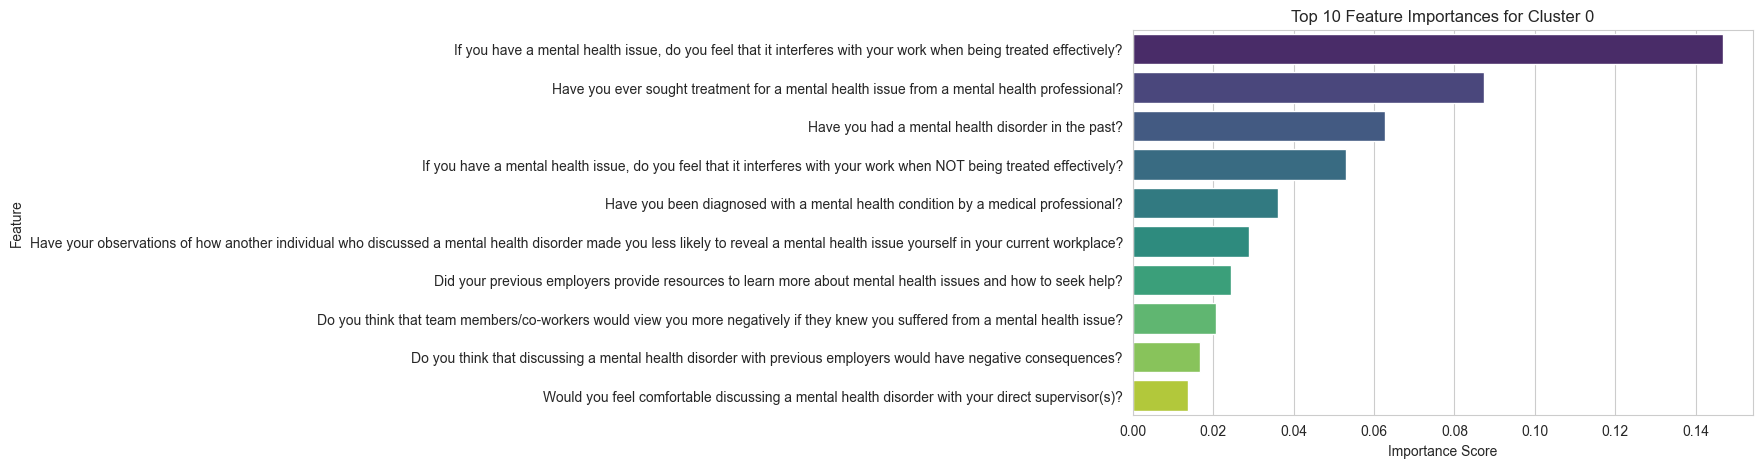


Top Features for Cluster 1:
 Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?    0.094451
Have you had a mental health disorder in the past?                                                                                0.087089
Do you feel that being identified as a person with a mental health issue would hurt your career?                                  0.070215
Do you think that discussing a physical health issue with your employer would have negative consequences?                         0.069422
Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?                                    0.050736
dtype: float64


/var/folders/78/59h2v8v932d536sz4kn1vh6m0000gp/T/ipykernel_7788/1053046815.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.head(10), y=importance.head(10).index, palette="viridis")


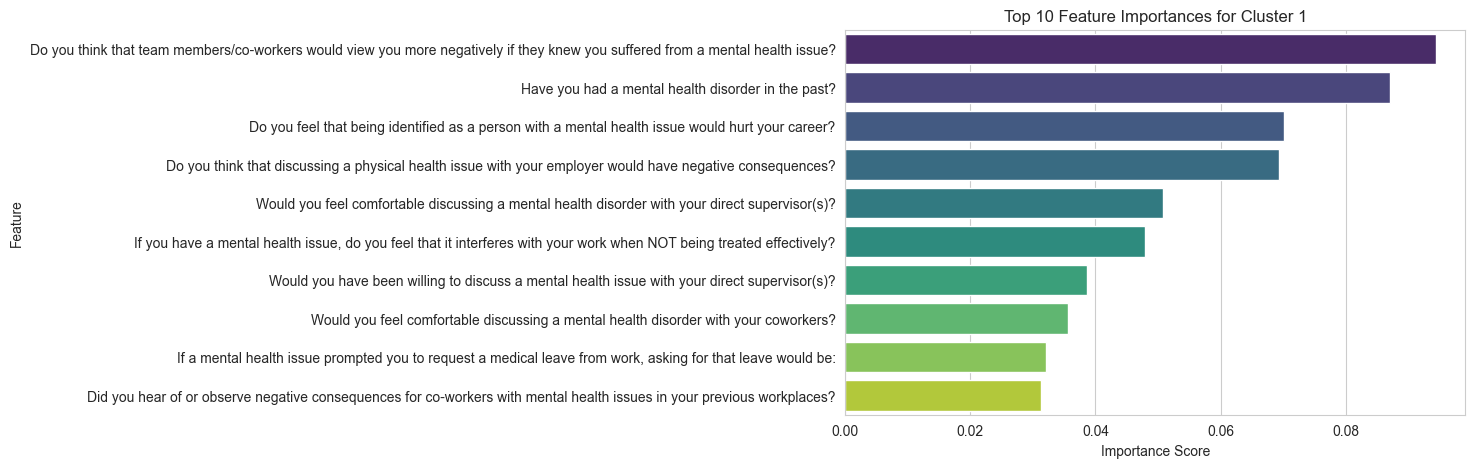


Top Features for Cluster 2:
 Have you been diagnosed with a mental health condition by a medical professional?                                                 0.171801
If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?                  0.168063
Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?    0.072027
Have you ever sought treatment for a mental health issue from a mental health professional?                                       0.071914
Would you have been willing to discuss a mental health issue with your direct supervisor(s)?                                      0.068290
dtype: float64


/var/folders/78/59h2v8v932d536sz4kn1vh6m0000gp/T/ipykernel_7788/1053046815.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.head(10), y=importance.head(10).index, palette="viridis")


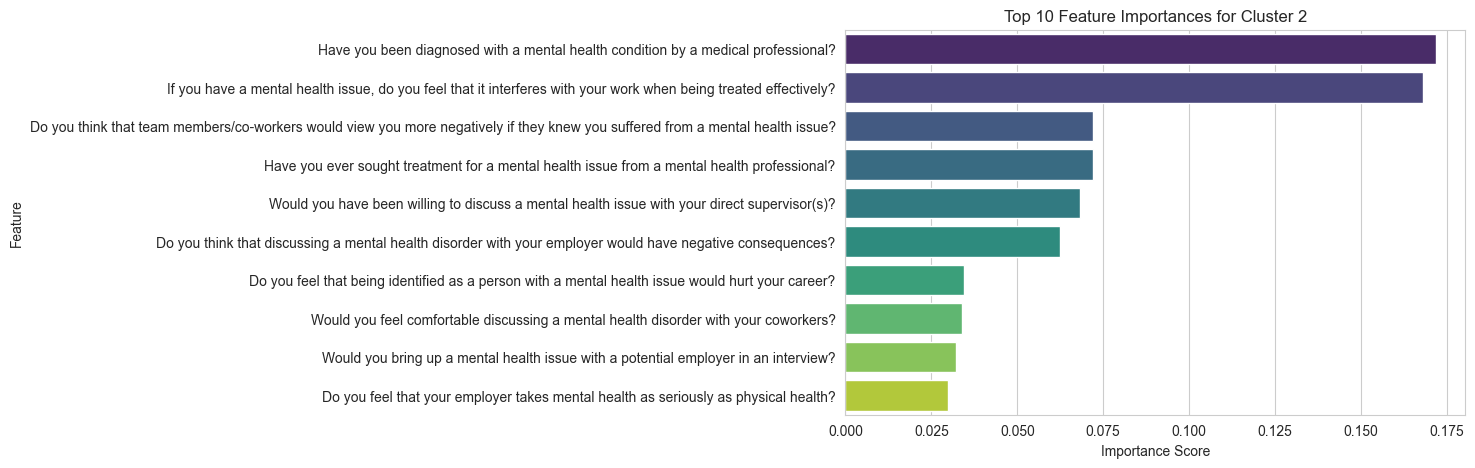

In [2303]:
for cluster_id, importance in cluster_importances.items():
    print(f"\nTop Features for Cluster {cluster_id}:\n", importance.head(5))

    # Plot Feature Importance
    plt.figure(figsize=(8, 5))
    sns.barplot(x=importance.head(10), y=importance.head(10).index, palette="viridis")
    plt.title(f"Top 10 Feature Importances for Cluster {cluster_id}")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()

In [2304]:
top_n = 5  # Number of top features to analyze per cluster
top_features_per_cluster = {}
for cluster_id, importance in cluster_importances.items():
    top_features_per_cluster[cluster_id] = importance.head(top_n).index.tolist()

In [2305]:
median_values_per_cluster = {}

In [2306]:
for cluster_id, features in top_features_per_cluster.items():
    median_values_per_cluster[cluster_id] = df2_reduced[df2_reduced['Cluster'] == cluster_id][features].median()

In [2307]:
median_df = pd.DataFrame(median_values_per_cluster)

In [2308]:
print("\nMedian Values of Top Features Per Cluster:\n", median_df)


Median Values of Top Features Per Cluster:
                                                                                                                                        0  \
Do you feel that being identified as a person with a mental health issue would hurt your career?                                     NaN   
Do you think that discussing a physical health issue with your employer would have negative consequences?                            NaN   
Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?       NaN   
Have you been diagnosed with a mental health condition by a medical professional?                                              -0.983154   
Have you ever sought treatment for a mental health issue from a mental health professional?                                    -1.158523   
Have you had a mental health disorder in the past?                                                                 

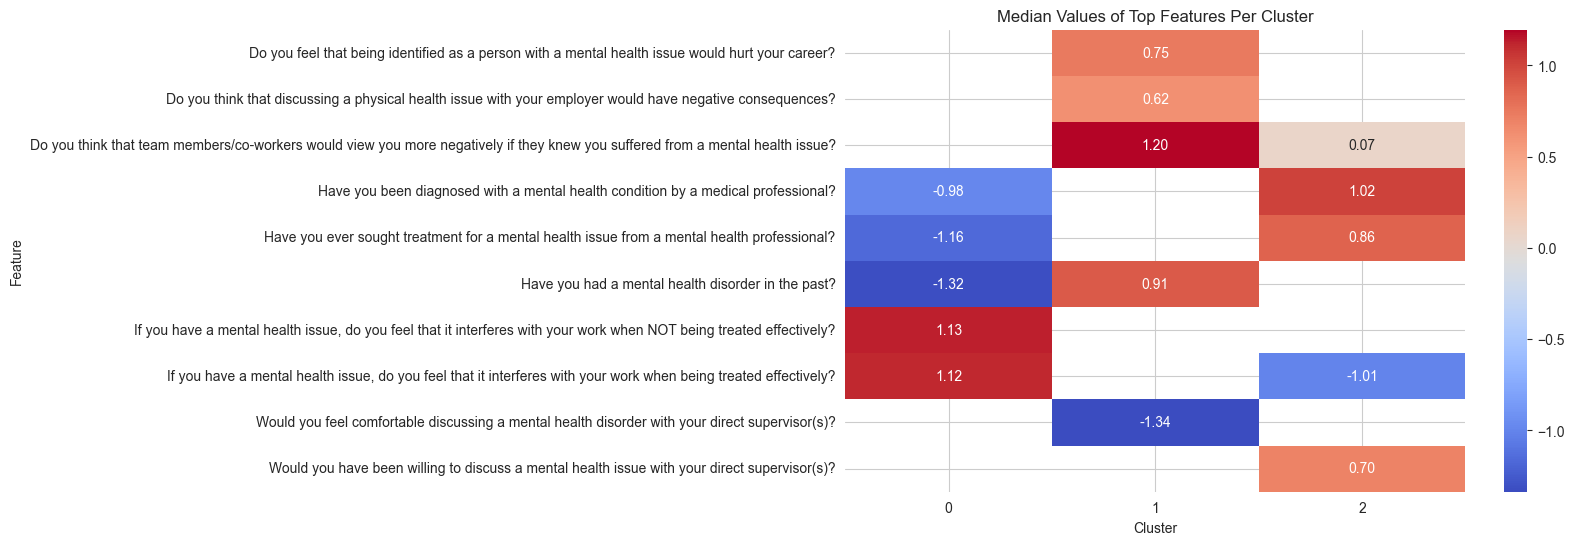

In [2309]:
plt.figure(figsize=(10, 6))
sns.heatmap(median_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Median Values of Top Features Per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.show()